<a href="https://colab.research.google.com/github/AmiMunshi/Image_Processing/blob/master/VideoProcessing_blurringipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import IPython.display as ipd
from moviepy.editor import *
import matplotlib.pyplot as plt

In [13]:
#Play the video file using moviepy
from moviepy.editor import *
clip=VideoFileClip("/content/bus_cif.y4m")
clip.ipython_display()

 99%|█████████▉| 150/151 [00:00<00:00, 556.23it/s]


In [4]:
# Read the video and save the frames in a list
new = cv2.VideoCapture('/content/bus_cif.y4m') 

images=[] #Create a list to store all the extracted frames

#Read each frame in the video
while(new.isOpened()):
    ret, frame = new.read()
    if ret == False:
        break
    # saving each frame in images list
    images.append(frame)

new.release()

In [5]:
#Convert the list to numpy array
images=np.array(images)

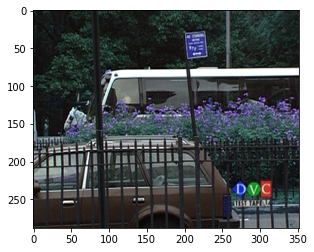

In [6]:
plt.imshow(images[2]) #show a particular frame in the video

In [7]:
#Blur the frame number 25 to 50 
img_smooth=images.copy()
for i in range(25,51):
  kernel = np.ones((9,9),np.float32)/25 #Create a smoothing/averaging mask
  img_smooth[i]= cv2.filter2D(images[i],-1,kernel) #Perform blurring

In [8]:
#Obtain size of each frame
m,n, p= img_smooth[0].shape
print(m,n)

288 352


In [14]:
#Reconstruct video from the frames

out = cv2.VideoWriter('/content/project.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, (n,m))
for i in range(len(img_smooth)):
    out.write(img_smooth[i])
out.release()

In [15]:
#Play the video file using moviepy
from moviepy.editor import *
clip=VideoFileClip('/content/project.avi')
clip.ipython_display()

 99%|█████████▉| 150/151 [00:00<00:00, 429.73it/s]
